Saving 1. Predict Loan Default.csv to 1. Predict Loan Default (3).csv
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.63      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



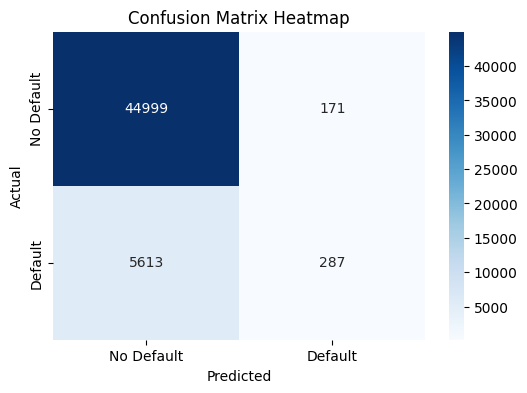


🔍 Enter data to predict loan default (type 'skip' to exit manual entry):
Age (numeric): 34
Income (numeric): 50000
LoanAmount (numeric): 100000
CreditScore (numeric): 500
MonthsEmployed (numeric): 12
NumCreditLines (numeric): 4
InterestRate (numeric): 12.00
LoanTerm (numeric): 24
DTIRatio (numeric): 0.32
Education (categorical): High School
EmploymentType (categorical): Unemployed
MaritalStatus (categorical): Single
HasMortgage (categorical): No
HasDependents (categorical): Yes
LoanPurpose (categorical): Auto
HasCoSigner (categorical): No

🔮 Prediction Result: ✅ No Default


In [4]:
# Upload CSV in Google Colab
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read uploaded file
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# Drop unnecessary columns if present
if 'LoanID' in df.columns:
    df.drop(columns=['LoanID'], inplace=True)

# Handle missing and infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Separate features and target
X = df.drop(columns=['Default'])
y = df['Default']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
labels = ['No Default', 'Default']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ========== User Input for Prediction ==========
print("\n🔍 Enter data to predict loan default (type 'skip' to exit manual entry):")

user_input = {}
for col in X.columns:
    # Check if column is categorical (encoded earlier)
    if col in label_encoders:
        raw_val = input(f"{col} (categorical): ")
        if raw_val.lower() == 'skip':
            user_input = None
            break
        raw_val = raw_val.title()  # Toggle case (e.g., 'male' -> 'Male')
        if raw_val not in label_encoders[col].classes_:
            print(f"⚠️  Warning: '{raw_val}' not in known categories for {col}.")
        encoded_val = label_encoders[col].transform([raw_val])[0]
        user_input[col] = encoded_val
    else:
        raw_val = input(f"{col} (numeric): ")
        if raw_val.lower() == 'skip':
            user_input = None
            break
        user_input[col] = float(raw_val)

if user_input:
    # Convert and scale input
    input_df = pd.DataFrame([user_input])
    input_scaled = scaler.transform(input_df)

    # Make prediction
    pred = clf.predict(input_scaled)[0]
    result = "🚫 Default" if pred == 1 else "✅ No Default"
    print(f"\n🔮 Prediction Result: {result}")
else:
    print("✔️ Skipped manual input. Program finished.")
